# <center> DIABETES ANALYSIS

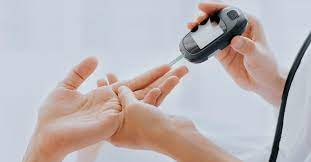

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

In [71]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [72]:
data=data.rename(columns={'Outcome':'Diabetes'})
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [74]:
data.shape

(768, 9)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [77]:
data.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Diabetes                    0.0
dtype: float64

# <CENTER> UNIVARIATE ANALYSIS
### <center> HISTOGRAM

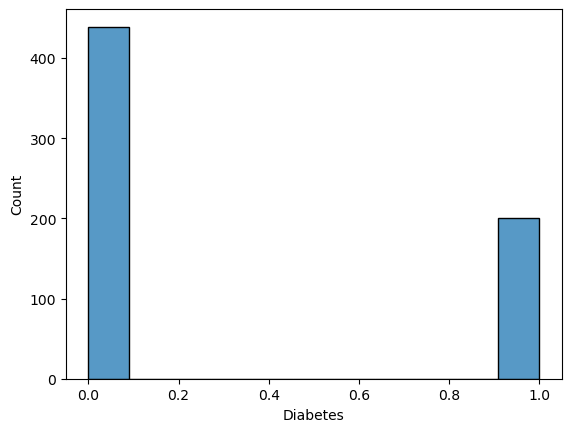

In [95]:
sns.histplot(x='Diabetes',data=data);

### <center> KDE PLOT

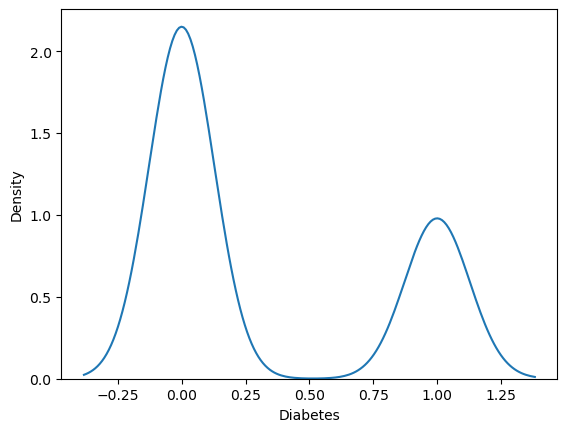

In [96]:
sns.kdeplot(x='Diabetes',data=data);

### <CENTER> BOXPLOT

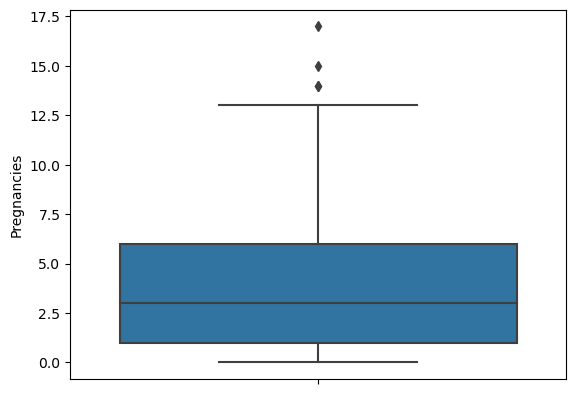

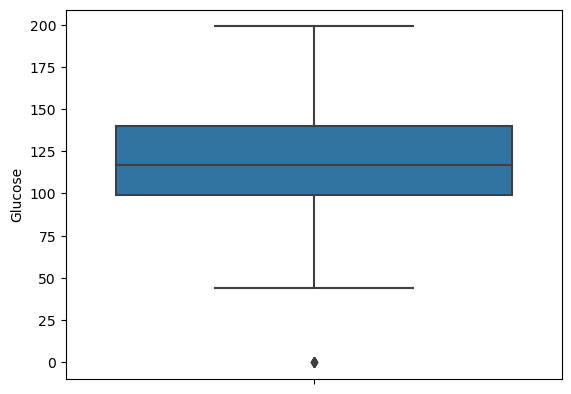

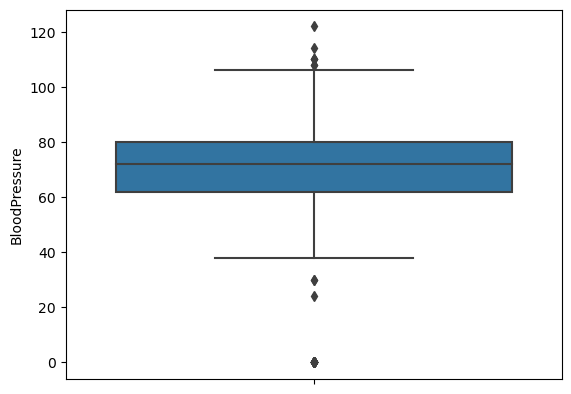

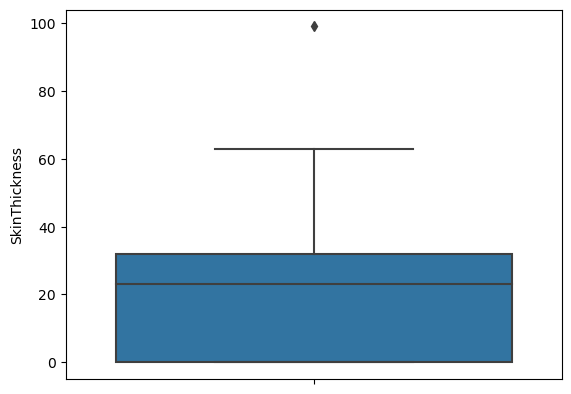

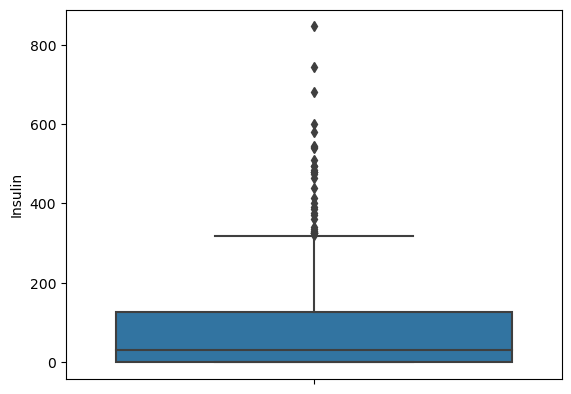

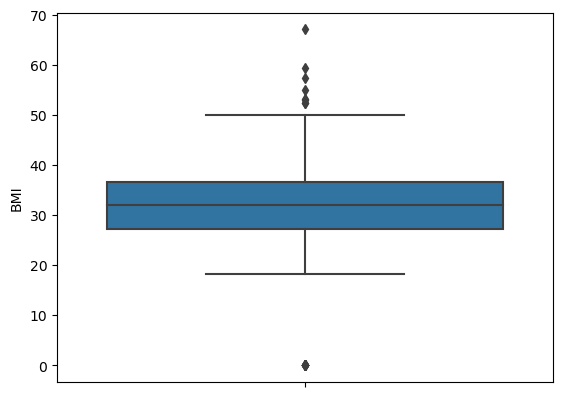

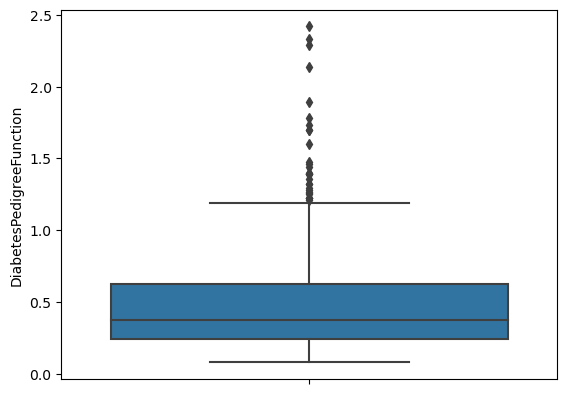

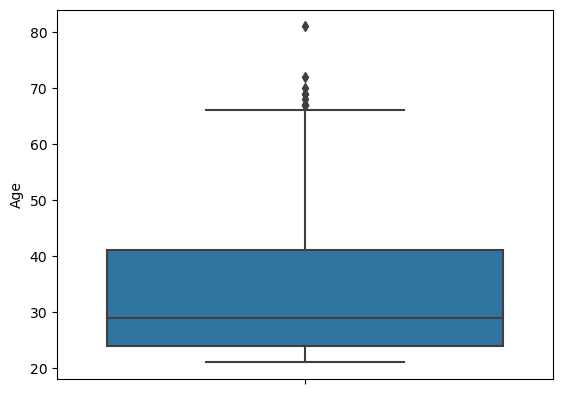

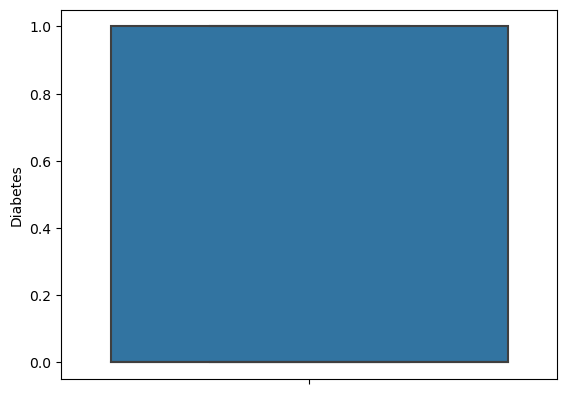

In [79]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(y=data[i])
    plt.show()

## <CENTER> TREATING THE OUTLIERS

In [ ]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [81]:
for i in data.columns:
    if data[i].dtype != 'object':
        UL,LL= outlier_limit(data[i])        
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

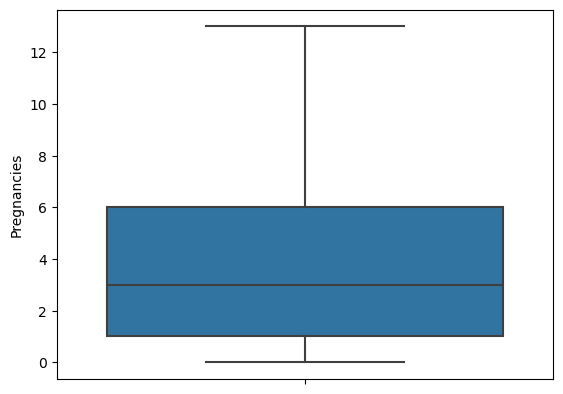

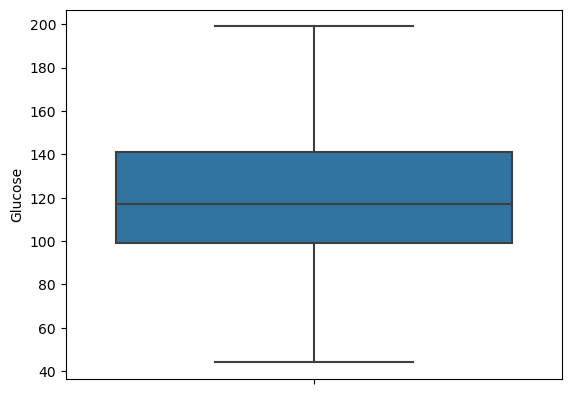

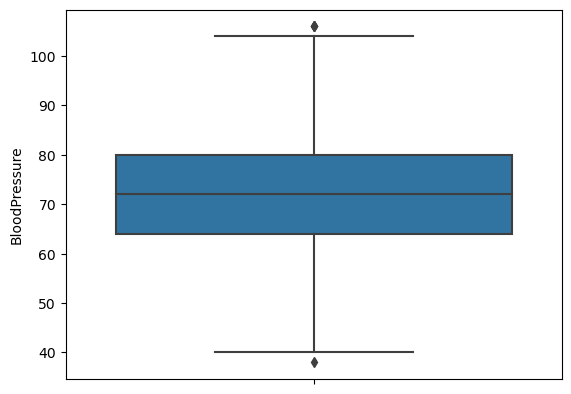

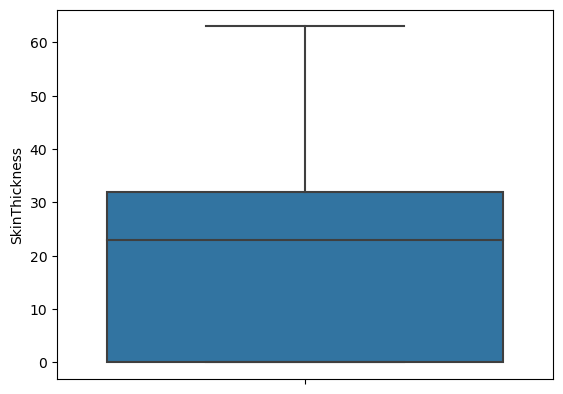

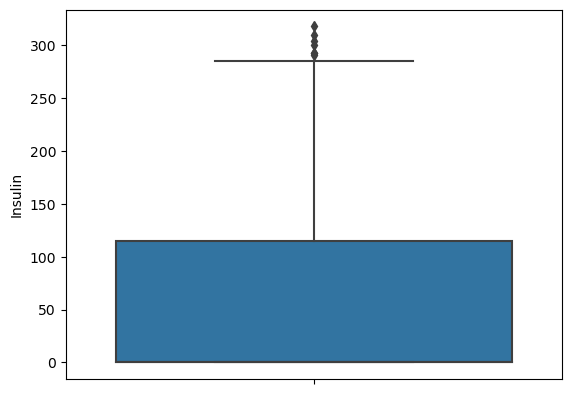

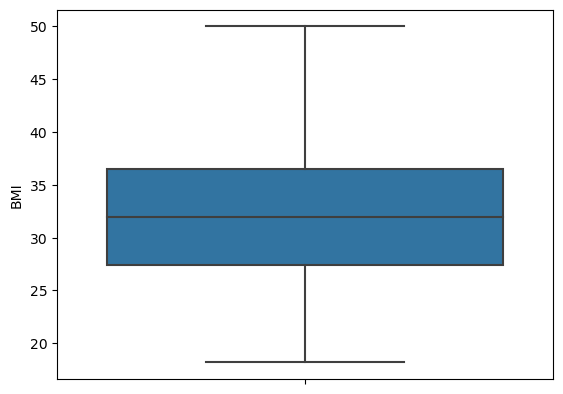

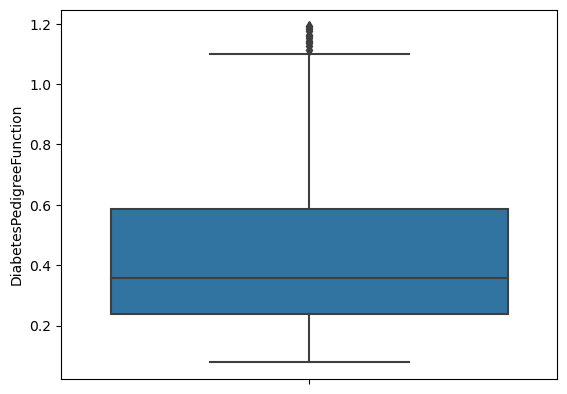

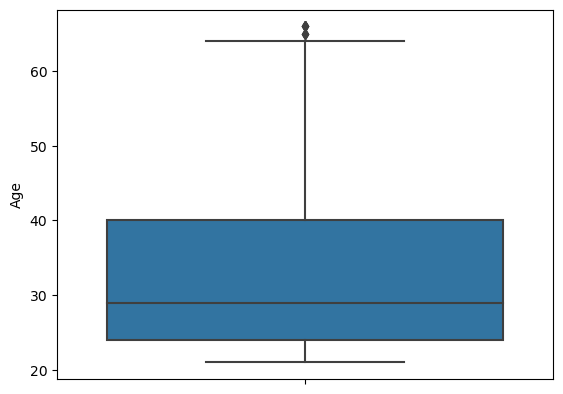

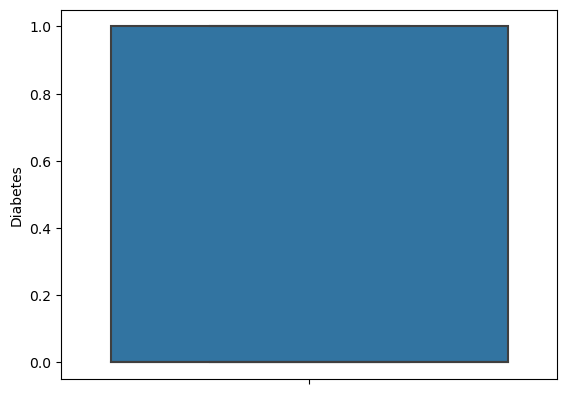

In [82]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i])
        plt.show();

In [83]:
data.dropna(inplace=True)

## <CENTER> BIVARIATE ANALYSIS

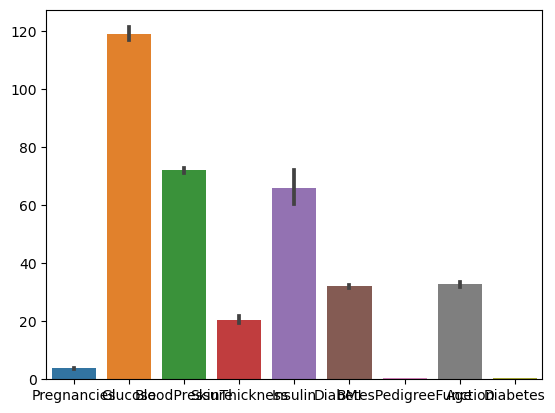

In [97]:
sns.barplot(data=data);

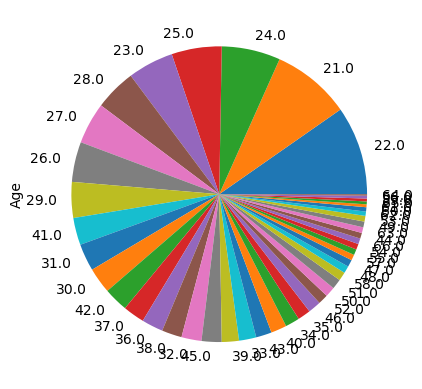

In [99]:
data.Age.value_counts().plot.pie();

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    float64
 1   Glucose                   639 non-null    float64
 2   BloodPressure             639 non-null    float64
 3   SkinThickness             639 non-null    float64
 4   Insulin                   639 non-null    float64
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    float64
 8   Diabetes                  639 non-null    float64
dtypes: float64(9)
memory usage: 49.9 KB


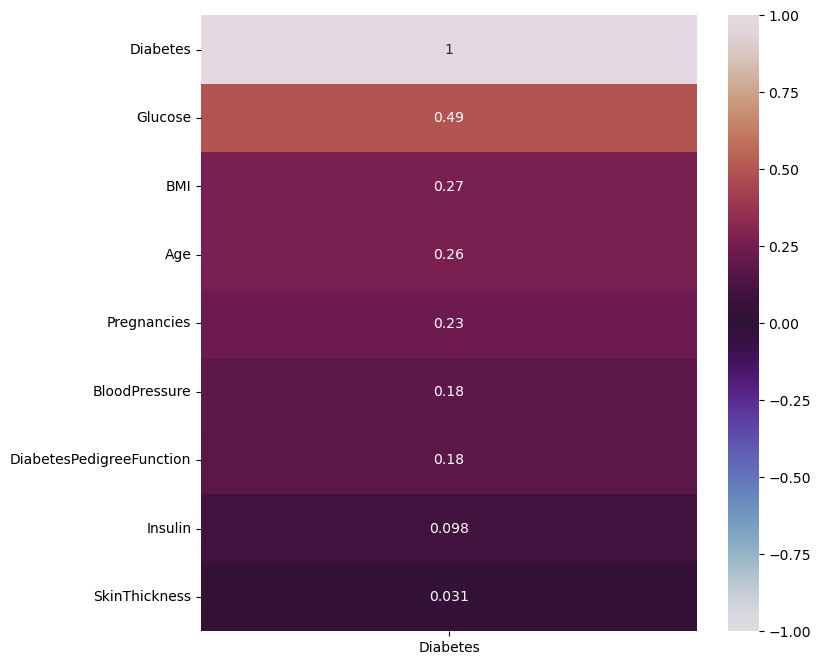

In [85]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr()[["Diabetes"]].sort_values(by="Diabetes", ascending=False), vmin=-1, vmax=1,annot=True, cmap="twilight");

In [86]:
x = data[['Glucose','Age','BMI']].values
y = data[['Diabetes']].values

## cross validation


In [87]:
models={
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [88]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=10, n_jobs=-1)
    print("cross validation model : {}".format(name))
    Average_score = np.mean(scores)
    print("Average score: ", Average_score)
    print("*"*100)

cross validation model : DecisionTreeClassifier
Average score:  0.6807787698412698
****************************************************************************************************
cross validation model : SVC
Average score:  0.7777777777777778
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Average score:  0.7496527777777777
****************************************************************************************************
cross validation model : LogisticRegression
Average score:  0.7826140873015873
****************************************************************************************************
cross validation model : AdaBoostClassifier
Average score:  0.7654017857142856
****************************************************************************************************
cross validation model : RandomForestClassifier
Average score:  0.749578373015873
*********************

### Logistic Regression has the best accuracy

#### Now I am splitting the data to train and test sets using SKlearn library

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=55)

In [90]:
model =LogisticRegression()

In [91]:
model.fit(x_train,y_train)
print("model traines with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
print("training_score: ", training_score)
print("testing_score: ", testing_score)

model traines with LogisticRegression()
training_score:  78.47358121330724
testing_score:  78.90625


In [92]:
y_predict = model.predict(x)

In [93]:
OUTPUT= pd.DataFrame(zip(y,y_predict), columns= ("ACTUAL", "PREDICTED"), dtype= float)
OUTPUT.head(5)

,ACTUAL,PREDICTED
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0


Model used is::  LogisticRegression()


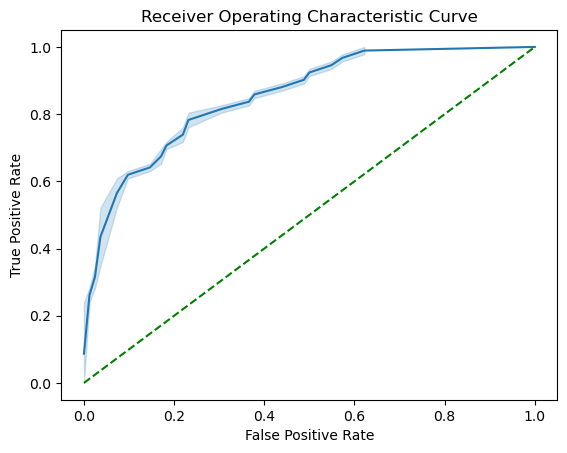

In [94]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()